### <p style="text-align: right;"> &#9989; Team member names </p>

# Project title and description

**Lorem Ipsum** is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.

Contrary to popular belief, **Lorem Ipsum** is not simply random text. It has roots in a piece of classical Latin literature from 45 BC, making it over 2000 years old. Richard McClintock, a Latin professor at Hampden-Sydney College in Virginia, looked up one of the more obscure Latin words, consectetur, from a Lorem Ipsum passage, and going through the cites of the word in classical literature, discovered the undoubtable source. Lorem Ipsum comes from sections 1.10.32 and 1.10.33 of "de Finibus Bonorum et Malorum" (The Extremes of Good and Evil) by Cicero, written in 45 BC. This book is a treatise on the theory of ethics, very popular during the Renaissance. The first line of Lorem Ipsum, "Lorem ipsum dolor sit amet..", comes from a line in section 1.10.32.

---
#### Importing libraries

In [266]:
import pandas as pd
import math
import matplotlib.pyplot as plt

#### Download and save file to current directory

In [107]:
!curl -o "FoodEnvironmentAtlas.xls" https://www.ers.usda.gov/webdocs/DataFiles/80526/FoodEnvironmentAtlas.xls?v=7810.2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.7M  100 13.7M    0     0  2382k      0  0:00:05  0:00:05 --:--:-- 2925k


#### Read downloaded file from its path into a variable - data

In [108]:
file = "./FoodEnvironmentAtlas.xls"
data = pd.ExcelFile(file)

#### Read all sheets into a dictionary of dataframes 

In [109]:
sheet_dict = {sheet_name: data.parse(sheet_name) for sheet_name in data.sheet_names}

#### Iterate over all sheets and print the name, number of rows and columns of each sheet

In [110]:
for sheet_name, df in sheet_dict.items():
    print("Sheet Name: {}".format(sheet_name.strip()))
    rows, columns = df.shape
    print("Number of rows and columns are {} and {}".format(rows, columns))
    print()

Sheet Name: Read_Me
Number of rows and columns are 17 and 1

Sheet Name: Variable List
Number of rows and columns are 281 and 7

Sheet Name: Supplemental Data - County
Number of rows and columns are 3142 and 12

Sheet Name: Supplemental Data - State
Number of rows and columns are 51 and 44

Sheet Name: ACCESS
Number of rows and columns are 3143 and 44

Sheet Name: STORES
Number of rows and columns are 3143 and 39

Sheet Name: RESTAURANTS
Number of rows and columns are 3143 and 19

Sheet Name: ASSISTANCE
Number of rows and columns are 3143 and 57

Sheet Name: INSECURITY
Number of rows and columns are 3143 and 9

Sheet Name: TAXES
Number of rows and columns are 3143 and 8

Sheet Name: LOCAL
Number of rows and columns are 3144 and 100

Sheet Name: HEALTH
Number of rows and columns are 3143 and 14

Sheet Name: SOCIOECONOMIC
Number of rows and columns are 3143 and 18



#### Extract the store availability variables 

In [111]:
store_availability = sheet_dict['STORES']

---
## Exploration Data Analysis (EDA)

#### Check the dimension of the dataset

In [112]:
row, columns = store_availability.shape
print("Number of rows and columns are {} and {}".format(rows, columns))

Number of rows and columns are 3143 and 39


In [113]:
store_availability.head()

,FIPS,State,County,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,...,PCH_SNAPS_12_17,SNAPSPTH12,SNAPSPTH17,PCH_SNAPSPTH_12_17,WICS11,WICS16,PCH_WICS_11_16,WICSPTH11,WICSPTH16,PCH_WICSPTH_11_16
0,1001,AL,Autauga,5,3,-40.000000,0.090581,0.054271,-40.085748,1,...,19.376392,0.674004,0.804747,19.397900,5.0,5.0,0.000000,0.090567,0.090511,-0.061543
1,1003,AL,Baldwin,27,29,7.407407,0.144746,0.139753,-3.449328,6,...,36.927711,0.725055,0.890836,22.864524,26.0,28.0,7.692307,0.139380,0.134802,-3.284727
2,1005,AL,Barbour,6,4,-33.333333,0.219370,0.155195,-29.254287,0,...,3.349282,1.280590,1.424614,11.246689,7.0,6.0,-14.285714,0.255942,0.232387,-9.203081
3,1007,AL,Bibb,6,5,-16.666667,0.263794,0.220916,-16.254289,1,...,11.794872,0.719122,0.801423,11.444711,6.0,5.0,-16.666666,0.263771,0.221474,-16.035471
4,1009,AL,Blount,7,5,-28.571429,0.121608,0.086863,-28.571429,1,...,5.701754,0.657144,0.692374,5.361034,8.0,8.0,0.000000,0.139000,0.139089,0.064332


*The dimension of the data is **3143** by **39**; the variable names are consistent with the descrption in the variable list sheet. The first few rows indicates I have the right data.*

In [114]:
store_availability.isna().sum()

FIPS                     0
State                    0
County                   0
GROC11                   0
GROC16                   0
PCH_GROC_11_16          21
GROCPTH11                0
GROCPTH16                0
PCH_GROCPTH_11_16       16
SUPERC11                 0
SUPERC16                 0
PCH_SUPERC_11_16       133
SUPERCPTH11              0
SUPERCPTH16              0
PCH_SUPERCPTH_11_16    132
CONVS11                  0
CONVS16                  0
PCH_CONVS_11_16         26
CONVSPTH11               0
CONVSPTH16               0
PCH_CONVSPTH_11_16      21
SPECS11                  0
SPECS16                  0
PCH_SPECS_11_16        250
SPECSPTH11               0
SPECSPTH16               0
PCH_SPECSPTH_11_16     247
SNAPS12                  0
SNAPS17                 26
PCH_SNAPS_12_17         32
SNAPSPTH12               0
SNAPSPTH17              27
PCH_SNAPSPTH_12_17      33
WICS11                 132
WICS16                 158
PCH_WICS_11_16         159
WICSPTH11              135
W

*The number of missing values for all the columns*

In [115]:
store_availability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3143 non-null   int64  
 1   State                3143 non-null   object 
 2   County               3143 non-null   object 
 3   GROC11               3143 non-null   int64  
 4   GROC16               3143 non-null   int64  
 5   PCH_GROC_11_16       3122 non-null   float64
 6   GROCPTH11            3143 non-null   float64
 7   GROCPTH16            3143 non-null   float64
 8   PCH_GROCPTH_11_16    3127 non-null   float64
 9   SUPERC11             3143 non-null   int64  
 10  SUPERC16             3143 non-null   int64  
 11  PCH_SUPERC_11_16     3010 non-null   float64
 12  SUPERCPTH11          3143 non-null   float64
 13  SUPERCPTH16          3143 non-null   float64
 14  PCH_SUPERCPTH_11_16  3011 non-null   float64
 15  CONVS11              3143 non-null   i

*There are **two** object predictors (State and County), **nine** int64 predictors, and **28** float64 predictors.*

In [116]:
stores = ["GROCERY", "SUPERCENTERS", "CONVENIENCE", "SPECIALIZED", "SNAP_authorized", "WIC_authorized"]

length_of_data = len(store_availability)
for store in stores:
    missing_values = store_availability.isna().sum().filter(like=store[:3]).sum()
    print("{} has {} missing values ({}% of the dataset)".format(store, missing_values, math.ceil(missing_values/length_of_data*100)))

GROCERY has 37 missing values (2% of the dataset)
SUPERCENTERS has 265 missing values (9% of the dataset)
CONVENIENCE has 47 missing values (2% of the dataset)
SPECIALIZED has 497 missing values (16% of the dataset)
SNAP_authorized has 118 missing values (4% of the dataset)
WIC_authorized has 907 missing values (29% of the dataset)


*There are **two** object predictors (State and County), **nine** int64 predictors, and **28** float64 predictors.*

#### Check if there is -9999 in the dataset

In [128]:
num_neg9999 = (store_availability == -9999).sum().sum()
print("Number of instances of -9999 = {}".format(num_neg9999))

Number of instances of -9999 = 0


#### Check whether the FIPS value of 37119 and 42029 have unique or duplicate entries

In [140]:
fip_values = store_availability[(store_availability['FIPS'] == 37119) | (store_availability['FIPS'] == 42029)]
fip_values

,FIPS,State,County,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,...,PCH_SNAPS_12_17,SNAPSPTH12,SNAPSPTH17,PCH_SNAPSPTH_12_17,WICS11,WICS16,PCH_WICS_11_16,WICSPTH11,WICSPTH16,PCH_WICSPTH_11_16
1949,37119,NC,Mecklenburg,200,216,8.000000,0.211653,0.204306,-3.471176,12,...,10.000000,0.674213,0.667387,-1.012493,168.0,212.0,26.190475,0.178013,0.200631,12.705785
2258,42029,PA,Chester,69,65,-5.797101,0.137067,0.125850,-8.183687,4,...,4.806517,0.403856,0.412901,2.239702,29.0,32.0,10.344828,0.057605,0.061918,7.486349


In [257]:
store_nofips_nocounty = store_availability.drop(columns=["FIPS", "County"])

In [258]:
columns_to_check = store_nofips_nocounty.columns.values.tolist()

In [259]:
if 'State' in columns_to_check:
    columns_to_check.remove('State')

In [260]:
nan_counts = store_nofips_nocounty.groupby("State")[columns_to_check].apply(lambda x: x.isna().sum().sum())

In [265]:
nan_counts_df = nan_counts.reset_index()
nan_counts_df.columns = ['State', 'NaN Occurrence']
nan_counts_df

,State,NaN Occurrence
0,AK,56
1,AL,12
2,AR,24
3,AZ,0
4,CA,20
5,CO,40
6,CT,0
7,DC,2
8,DE,0
9,FL,12


#### Plot a horizontal bar graph to show the number of NANs by state in a descending order 

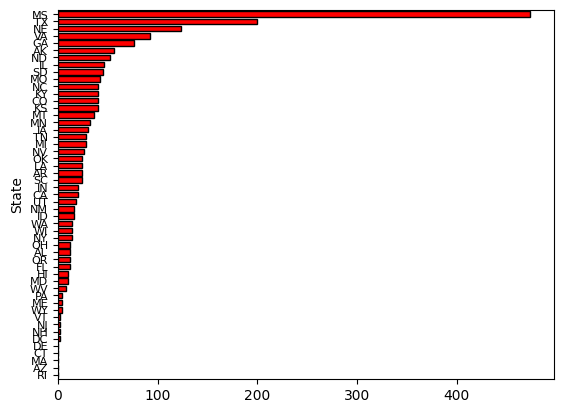

In [342]:
nan_counts_df_sorted = nan_counts_df.sort_values('NaN Occurrence', ascending=True)
ax = nan_counts_df_sorted.plot(kind='barh', x='State', y='NaN Occurrence', color='red', edgecolor='black', width=0.75, legend=False)
ax.tick_params(axis='y', labelsize=8)